# **Problem Objective :**
Perform a service request data analysis of New York City 311 calls. You will focus on the data
wrangling techniques to understand the pattern in the data and also visualize the major complaint
types.

## **Import all the libraries**


In [62]:
pip install pandas

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


## **Load the csv file**

In [64]:
data = pd.read_csv('/content/311_Service_Requests_from_2010_to_Present.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


# **Converting created date and closed date to datetime datatype**

In [65]:
data['Created Date'] = pd.to_datetime(data['Created Date'], infer_datetime_format=True)
data['Closed Date'] = pd.to_datetime(data['Closed Date'], infer_datetime_format=True)
# data['Closed Date'].fillna(data['Created Date'], inplace=True)

# **Adding new column by calculating time elapsed between Created date and closed date**

In [66]:
data['Request_Closing_Time'] = data['Closed Date'] - data['Created Date']

In [93]:
data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [68]:
missing = data.isnull().sum()
# missing = missing[missing>0]
missing.sort_values(inplace=True)

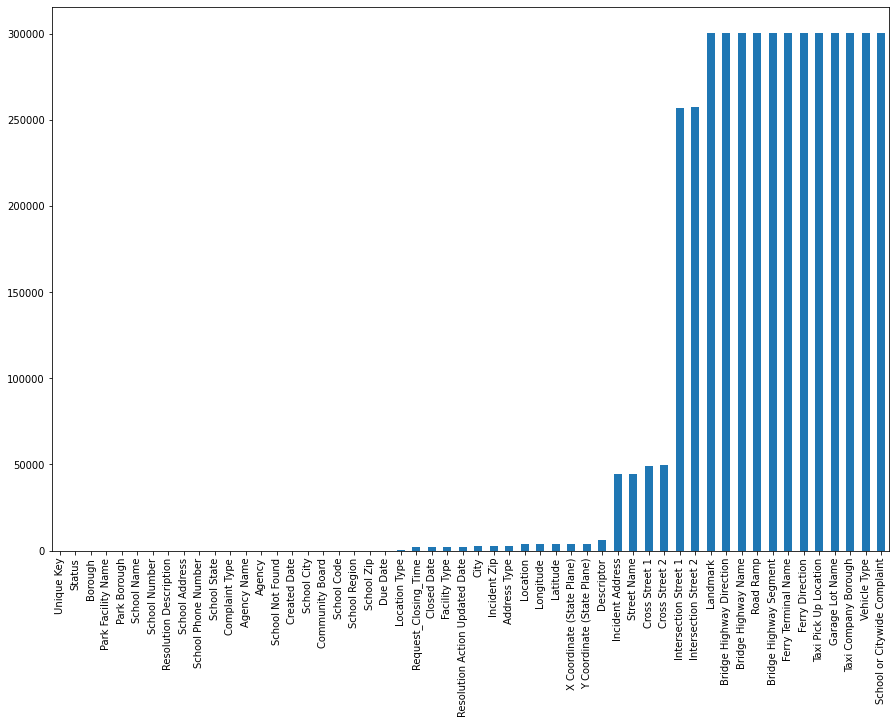

In [69]:
plt.figure(figsize=(15,10))
missing.plot.bar()

From the above graph we can conclude that :
1. School or Citywide Complaint has the maximum missing values.

In [70]:
del data['School or Citywide Complaint']
del data['Taxi Pick Up Location']
del data['Vehicle Type']
del data['Ferry Terminal Name']
del data['Ferry Direction']
del data['Garage Lot Name']
del data['Taxi Company Borough']
del data['Landmark']
del data['Bridge Highway Segment']
del data['Road Ramp']
del data['Bridge Highway Direction']
del data['Intersection Street 2']
del data['Bridge Highway Name']
del data['Intersection Street 1']

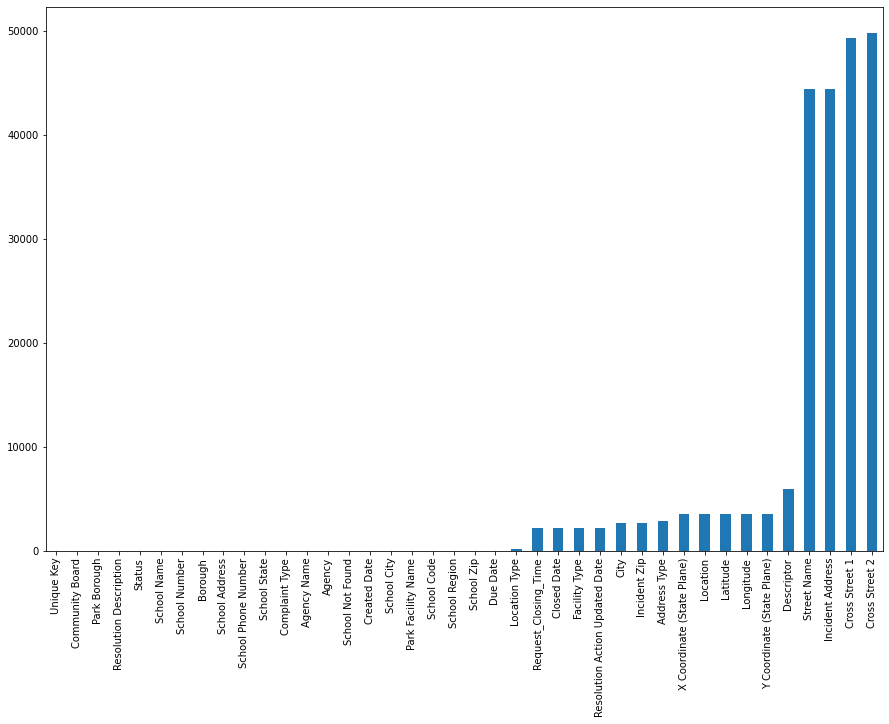

In [71]:
missing = data.isnull().sum()
# missing = missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,10))
missing.plot.bar()

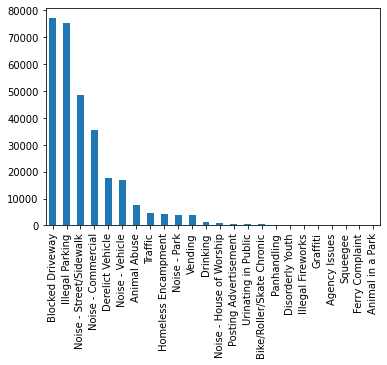

In [72]:
data['Complaint Type'].value_counts().plot.bar()

From the above graph we can conclude that :
1. The most common conplaint type is **Blocked driveway**

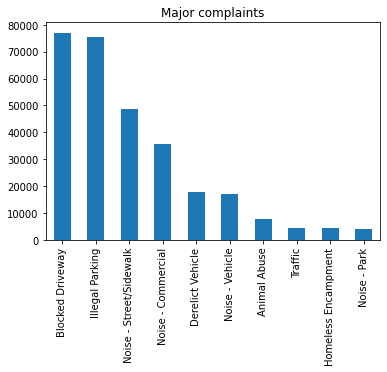

In [73]:
data['Complaint Type'].value_counts().head(10).plot.bar(title="Major complaints")

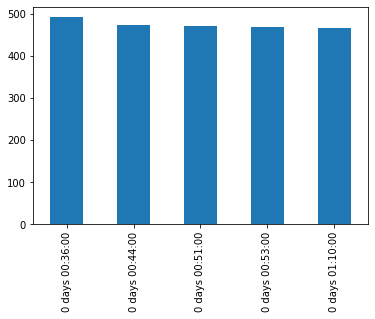

In [74]:
data['Request_Closing_Time'].value_counts().head().plot.bar()

In [75]:
data['City'].fillna('Unknown',inplace=True) 
data['City']

0              NEW YORK
1               ASTORIA
2                 BRONX
3                 BRONX
4              ELMHURST
              ...      
300693          Unknown
300694    RICHMOND HILL
300695         BROOKLYN
300696            BRONX
300697         NEW YORK
Name: City, Length: 300698, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text major ticklabel objects>)

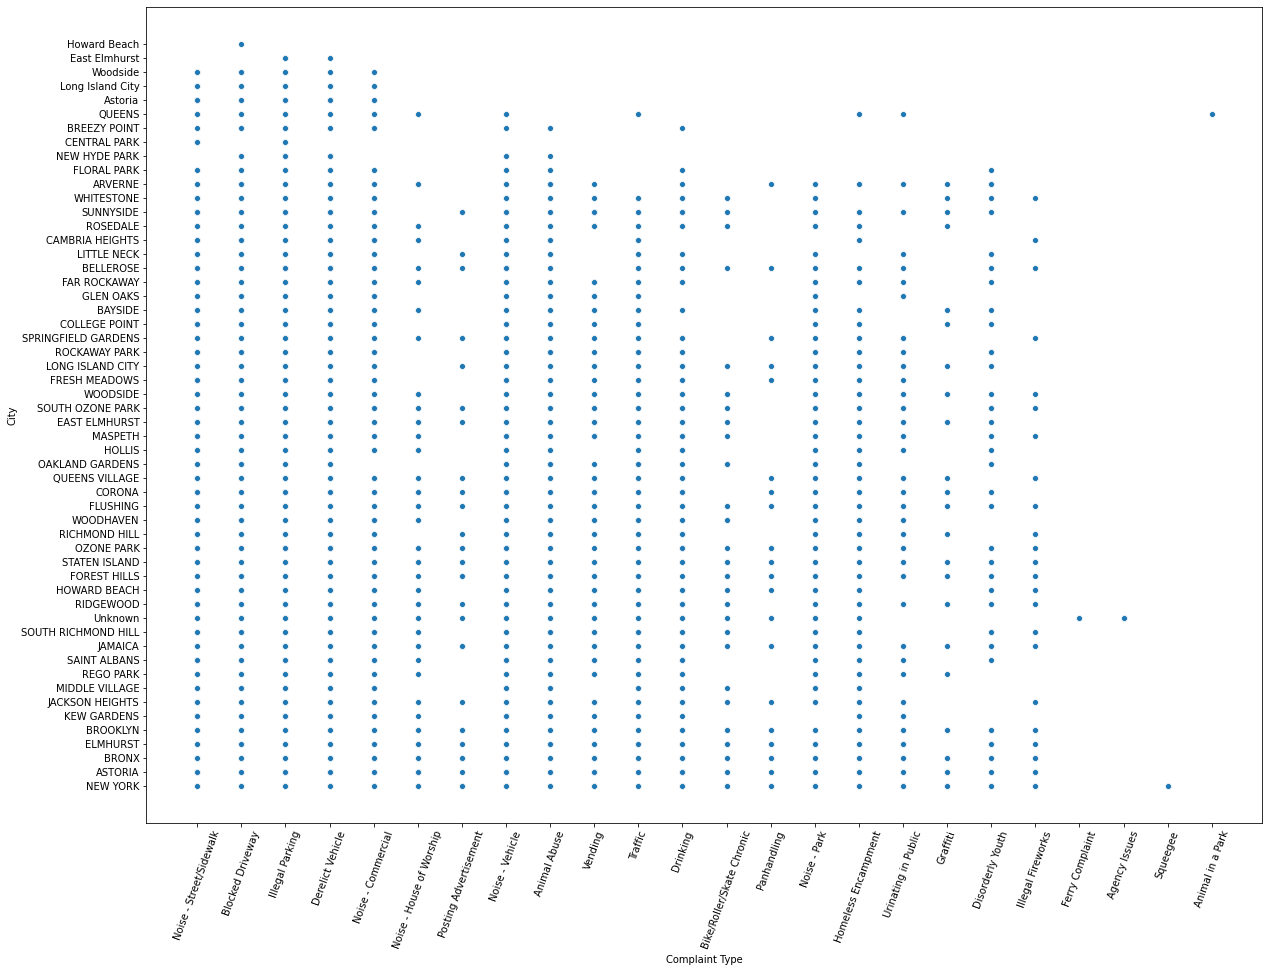

In [76]:
plt.figure(figsize=(20,15))
# comType = data['Complaint Type'].value_counts().head(10)
# comType
# chart = sns.scatterplot(x='Complaint Type',y='City',data=data)
# chart.xtick(
#     rotation=90, 
#     horizontalalignment='right',
#     fontweight='light',
#     fontsize='x-large')
sns.scatterplot(x='Complaint Type',y='City',data=data)
plt.xticks(rotation=70)
# sns.heatmap(data)

In [77]:
complaintTypecity =data.groupby(['City','Complaint Type']).size()
print(complaintTypecity)

City      Complaint Type         
ARVERNE   Animal Abuse                38
          Blocked Driveway            35
          Derelict Vehicle            27
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            11
          Derelict Vehicle             2
          Illegal Parking            100
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 782, dtype: int64


In [78]:
tabledata = pd.crosstab(data['Complaint Type'],data['City'],margins=True)
tabledata

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,All
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,6
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,28,61,59,38,0,89,2,143,45,45,5,33,31,0,42,229,19,15,30,0,36,22,1,1525,19,48,0,66,26,32,117,30,33,30,55,26,24,557,35,11,28,45,69,0,7778
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,0,0,1,2,0,0,0,3,5,0,0,0,1,0,2,2,0,0,3,0,1,1,0,225,2,1,0,0,0,0,3,0,2,0,1,1,0,7,2,5,4,2,4,0,427
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,435,2761,1408,1446,0,284,20,2795,663,503,30,342,167,1,568,2818,313,121,772,34,732,457,53,2072,132,1259,2,585,611,872,1694,70,211,244,942,1548,262,2142,206,283,208,1060,1613,11,77044
Derelict Vehicle,27,351,12,198,89,3,1953,5181,115,0,184,57,113,78,1,187,56,440,52,291,49,143,138,0,29,954,14,61,195,4,434,296,14,537,86,420,1,370,81,167,330,9,208,202,358,289,210,1766,10,171,227,308,247,2,17718
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,1,6,1,2,0,1,1,2,1,0,0,1,1,0,0,8,0,2,1,0,2,0,0,69,1,4,0,0,0,0,3,4,0,1,2,2,0,23,2,0,1,0,1,0,286
Drinking,1,35,0,1,1,1,188,257,0,0,0,33,9,13,0,4,1,40,1,2,0,3,4,0,9,34,1,1,7,0,9,2,0,295,1,19,0,5,4,9,10,20,2,3,13,23,6,175,10,8,2,3,15,0,1280
Ferry Complaint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2


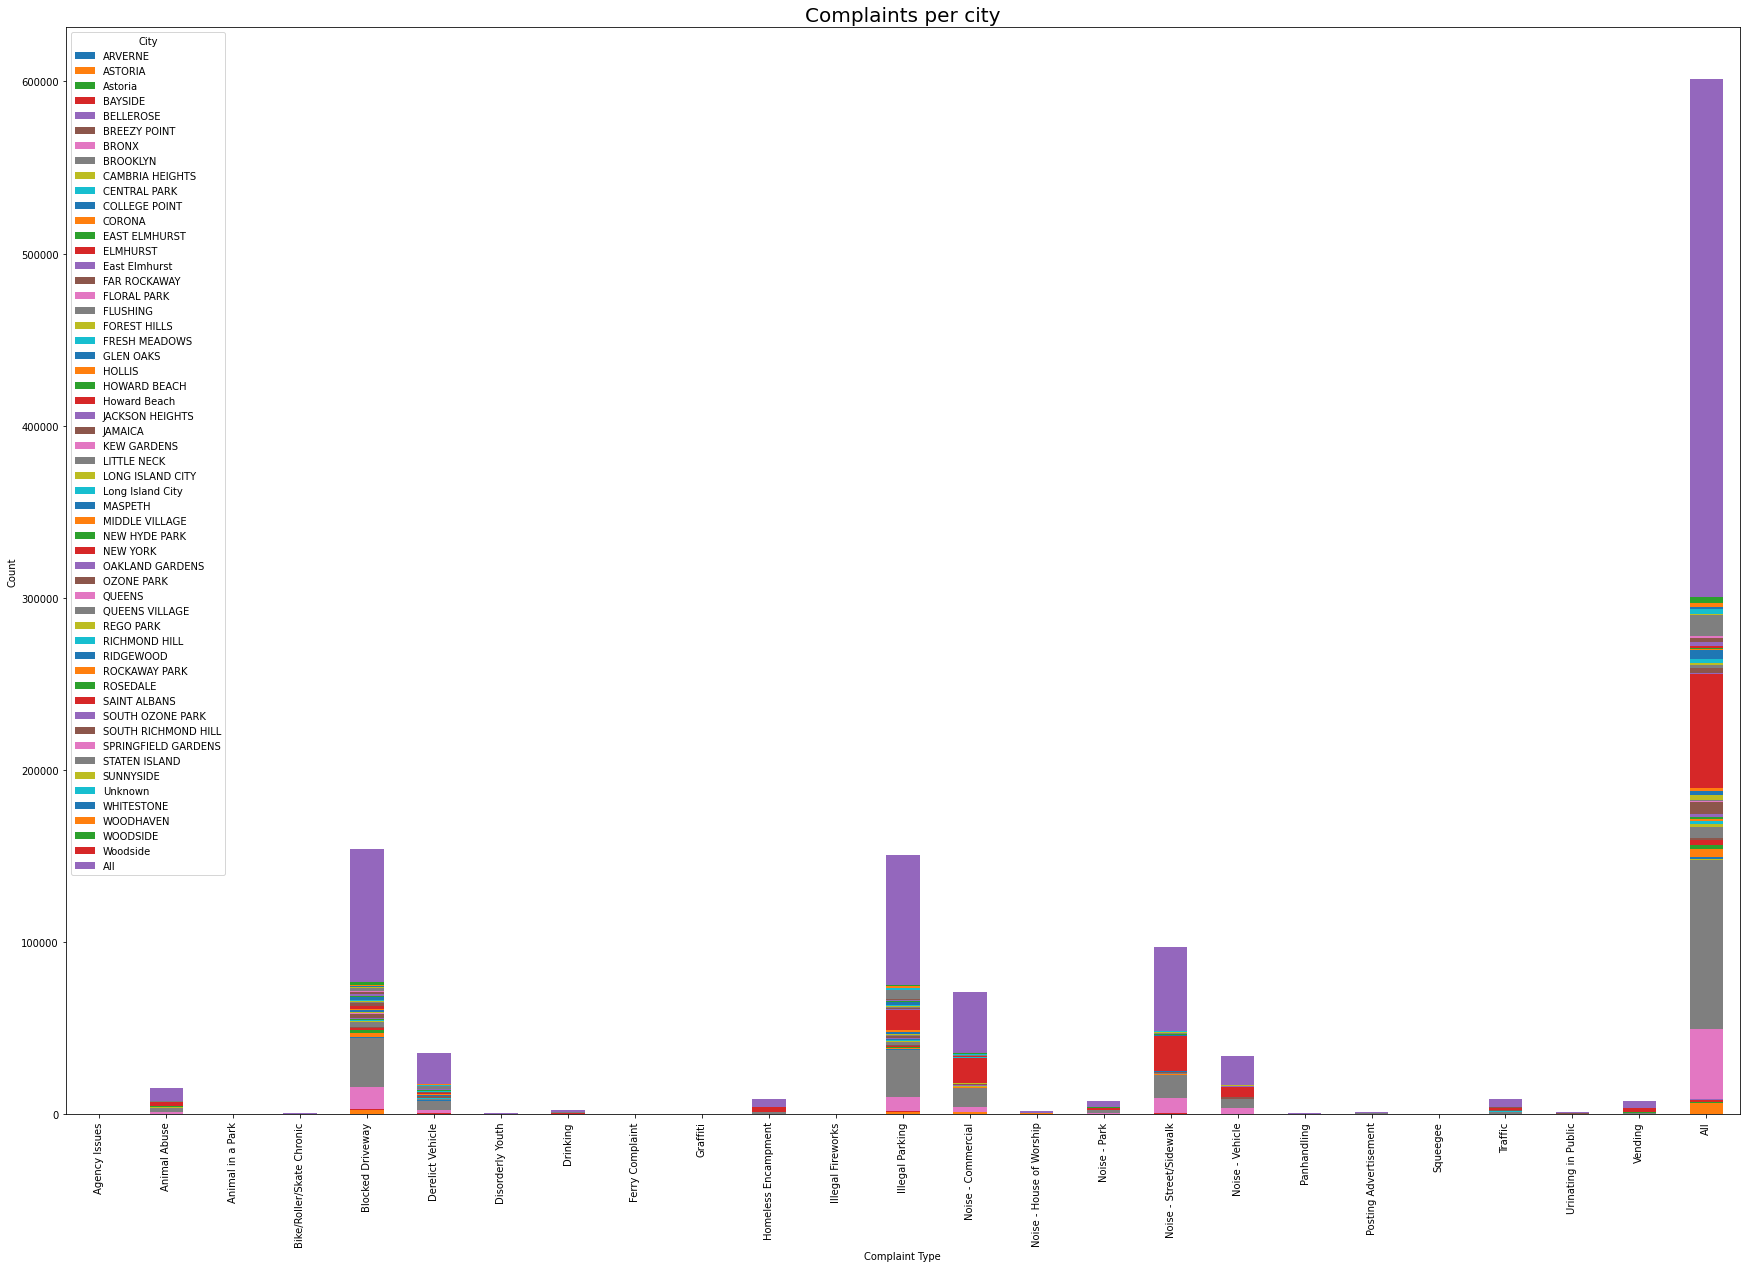

In [79]:
tabledata.plot.bar(figsize=(30,20),stacked=True)
plt.title('Complaints per city',fontsize=20)
plt.ylabel('Count')
plt.show()


## From the above graph we can observe that **Brooklyn** has reported maximum compaints

In [80]:
resolveTime = pd.crosstab(index=data['Request_Closing_Time'],columns=data['Complaint Type'])
# resolveTime.plot.bar(figsize=(30,20),stacked=True)
# plt.title('Complaints per city',fontsize=20)
# plt.ylabel('Count')
# plt.show()
resolveTime

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Request_Closing_Time,,,,,,,,,,,,,,,,,,,,,,,
0 days 00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
0 days 00:02:00,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,0,0,0
0 days 00:02:26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0 days 00:02:28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0 days 00:02:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9 days 07:22:12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14 days 00:50:05,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21 days 15:16:01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
data['Request_Closing_Time'].value_counts().sum()

298534

In [82]:
c = data.groupby(['City',"Complaint Type"])["Request_Closing_Time"].sum()
c


City      Complaint Type         
ARVERNE   Animal Abuse               3 days 09:50:16
          Blocked Driveway           3 days 16:24:32
          Derelict Vehicle           3 days 08:08:31
          Disorderly Youth           0 days 07:10:57
          Drinking                   0 days 00:14:19
                                          ...       
Woodside  Blocked Driveway           2 days 22:28:06
          Derelict Vehicle           0 days 09:56:00
          Illegal Parking           21 days 17:55:13
          Noise - Commercial         0 days 04:47:18
          Noise - Street/Sidewalk    0 days 17:03:23
Name: Request_Closing_Time, Length: 782, dtype: timedelta64[ns]

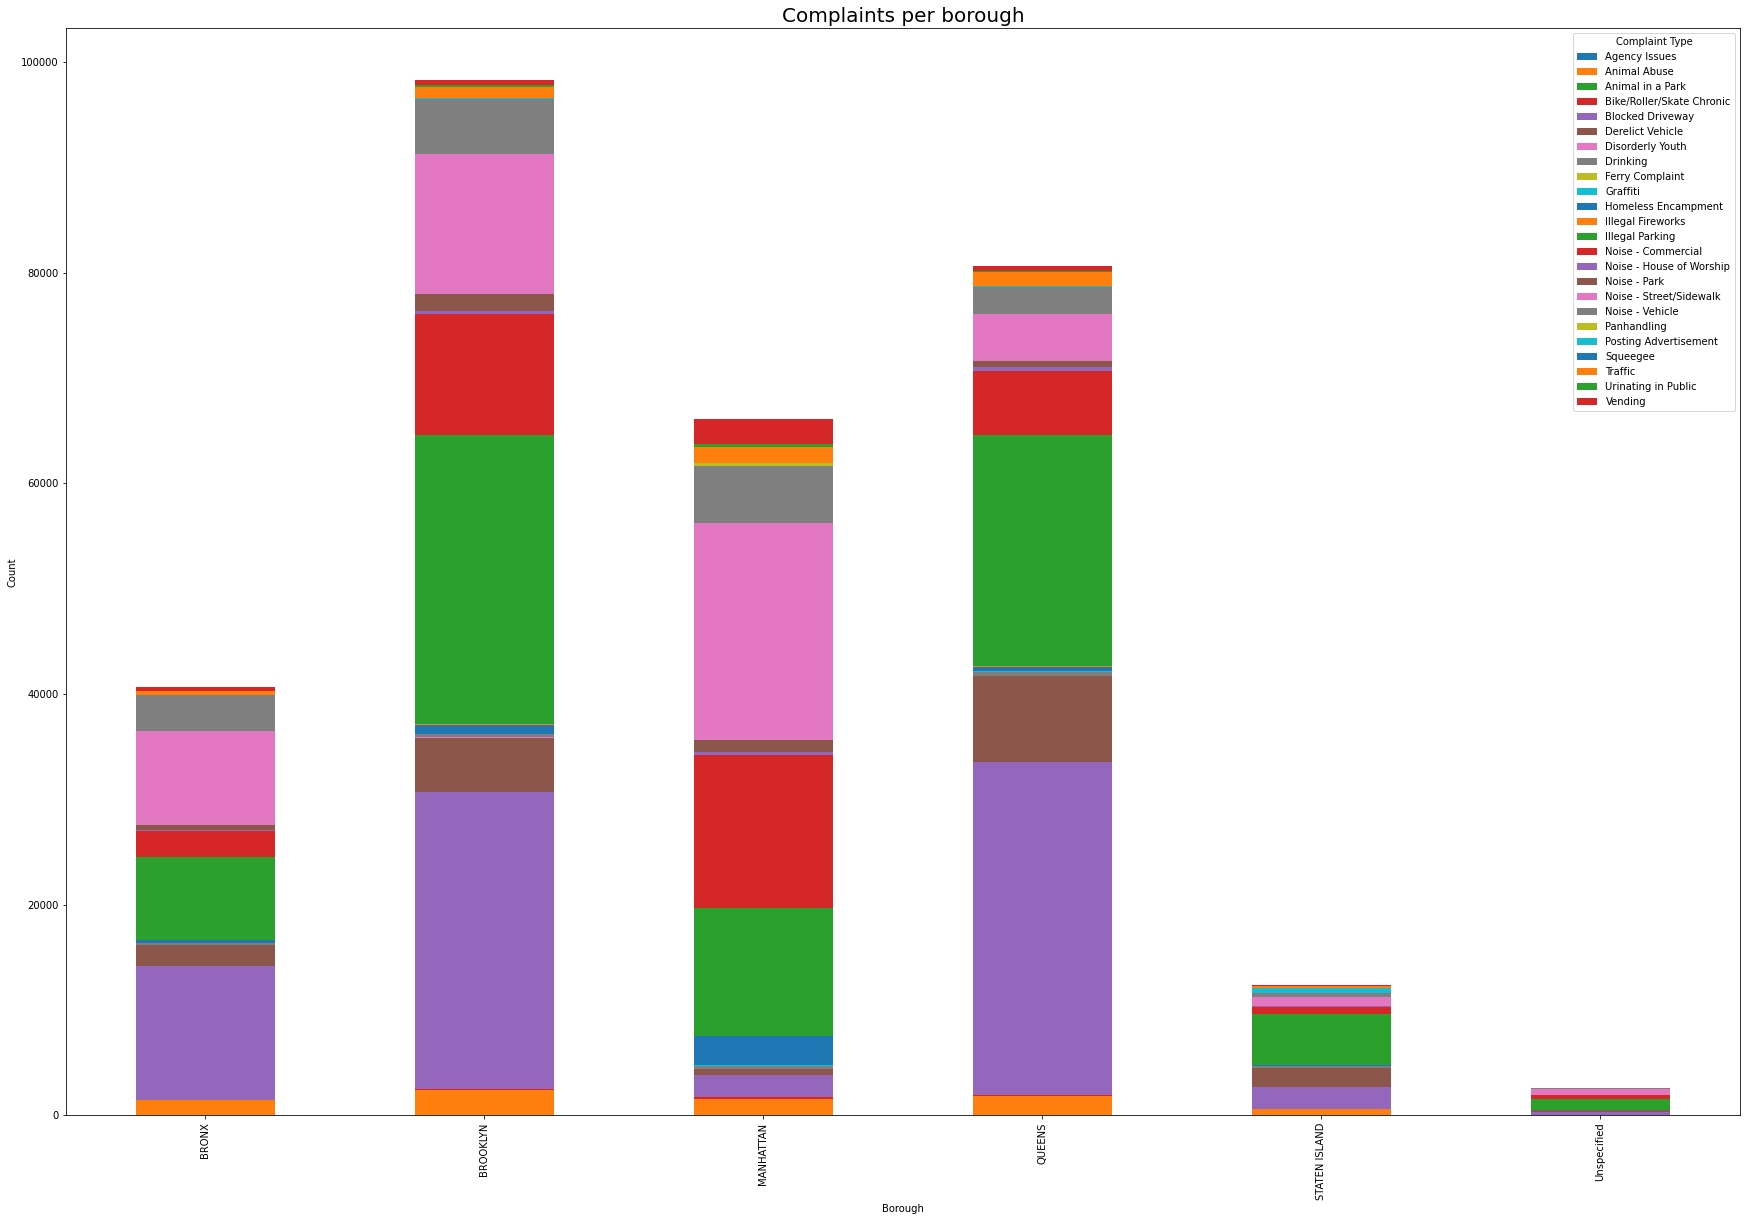

In [83]:
tabledata = pd.crosstab(index=data['Borough'],columns=data['Complaint Type'])
tabledata.plot.bar(figsize=(30,20),stacked=True)
plt.title('Complaints per borough',fontsize=20)
plt.ylabel('Count')
plt.show()

In [84]:
gr = data.groupby('Complaint Type').Request_Closing_Time
mean_response_times = ['Complaint Type','Average']
mean_response_times = gr.sum() / gr.count()
# mean_response_times.type()
mean_response_times

Complaint Type
Agency Issues               0 days 05:15:37.166666
Animal Abuse                0 days 05:12:47.677780
Animal in a Park                  14 days 00:50:05
Bike/Roller/Skate Chronic   0 days 03:45:59.264150
Blocked Driveway            0 days 04:44:27.258638
Derelict Vehicle            0 days 07:21:50.902717
Disorderly Youth            0 days 03:33:30.902097
Drinking                    0 days 03:51:42.598431
Ferry Complaint                                NaT
Graffiti                    0 days 07:09:04.504424
Homeless Encampment         0 days 04:21:56.052536
Illegal Fireworks           0 days 02:45:40.101190
Illegal Parking             0 days 04:30:04.145454
Noise - Commercial          0 days 03:08:49.755979
Noise - House of Worship    0 days 03:11:35.874058
Noise - Park                0 days 03:24:38.636996
Noise - Street/Sidewalk     0 days 03:26:42.806681
Noise - Vehicle             0 days 03:35:20.376269
Panhandling                 0 days 04:22:21.963934
Posting Advertis

In [85]:
def toHr(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    return result

data['Request_Closing_In_Hr'] = data['Request_Closing_Time'].apply(toHr)

data['Request_Closing_In_Hr'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_In_Hr, dtype: float64

In [86]:
dfg = data.groupby(['City','Complaint Type']).agg({'Request_Closing_In_Hr': 'mean'})
dfg

Request_Closing_In_Hr
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153158
         Blocked Driveway                      2.526000
         Derelict Vehicle                      2.968889
         Disorderly Youth                      3.595000
         Drinking                              0.240000
...                                                 ...
Woodside Blocked Driveway                      6.405455
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.219500
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.410000

[782 rows x 1 columns]

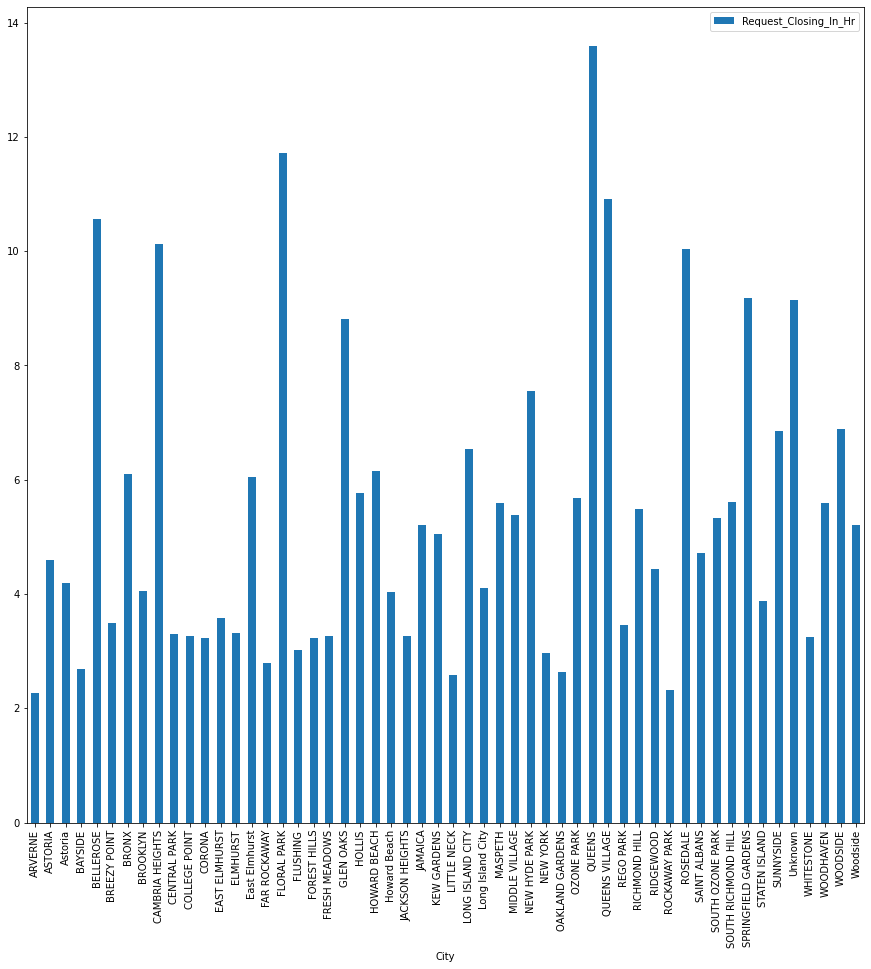

In [87]:
# plt.figure(figsize=(20,15))
closing_request_city = data.groupby(['City']).agg({'Request_Closing_In_Hr': 'mean'})
closing_request_city.plot.bar(figsize=(15,15))

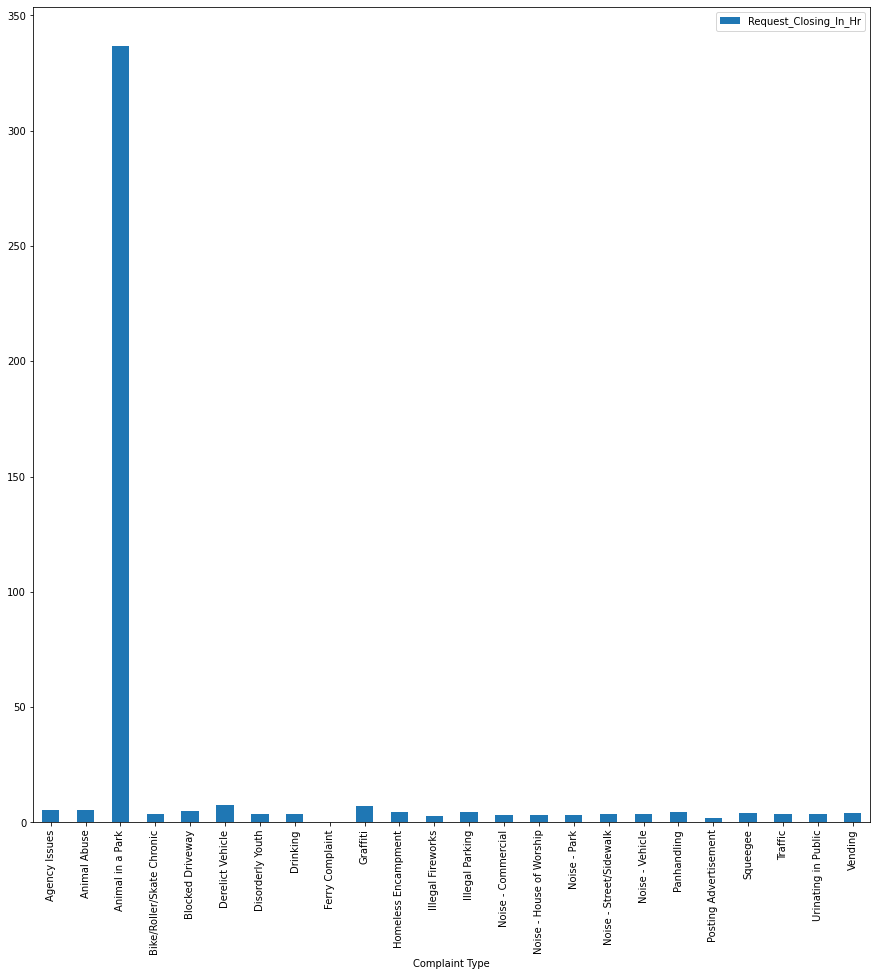

In [88]:
closing_request_comtype = data.groupby(['Complaint Type']).agg({'Request_Closing_In_Hr': 'mean'})
closing_request_comtype.plot.bar(figsize=(15,15))

# **Are the type of complaint or service requested and location related?**


In [106]:
tabledata = pd.crosstab(data['Complaint Type'],data['City'],margins=True)
tabledata

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,All
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,6
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,28,61,59,38,0,89,2,143,45,45,5,33,31,0,42,229,19,15,30,0,36,22,1,1525,19,48,0,66,26,32,117,30,33,30,55,26,24,557,35,11,28,45,69,0,7778
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,0,0,1,2,0,0,0,3,5,0,0,0,1,0,2,2,0,0,3,0,1,1,0,225,2,1,0,0,0,0,3,0,2,0,1,1,0,7,2,5,4,2,4,0,427
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,435,2761,1408,1446,0,284,20,2795,663,503,30,342,167,1,568,2818,313,121,772,34,732,457,53,2072,132,1259,2,585,611,872,1694,70,211,244,942,1548,262,2142,206,283,208,1060,1613,11,77044
Derelict Vehicle,27,351,12,198,89,3,1953,5181,115,0,184,57,113,78,1,187,56,440,52,291,49,143,138,0,29,954,14,61,195,4,434,296,14,537,86,420,1,370,81,167,330,9,208,202,358,289,210,1766,10,171,227,308,247,2,17718
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,1,6,1,2,0,1,1,2,1,0,0,1,1,0,0,8,0,2,1,0,2,0,0,69,1,4,0,0,0,0,3,4,0,1,2,2,0,23,2,0,1,0,1,0,286
Drinking,1,35,0,1,1,1,188,257,0,0,0,33,9,13,0,4,1,40,1,2,0,3,4,0,9,34,1,1,7,0,9,2,0,295,1,19,0,5,4,9,10,20,2,3,13,23,6,175,10,8,2,3,15,0,1280
Ferry Complaint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2


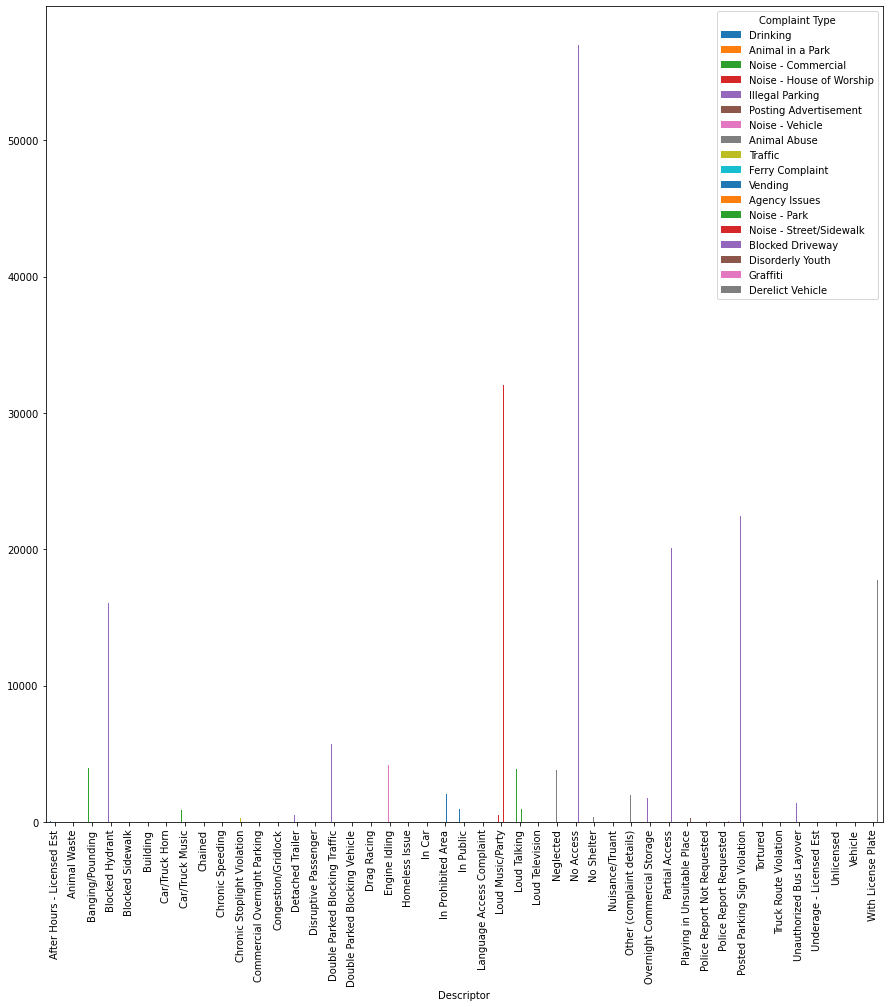

In [115]:
data.groupby(['Descriptor','Complaint Type']).size().unstack().plot.bar(figsize=(15,15),legend=True)

In [116]:
data['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

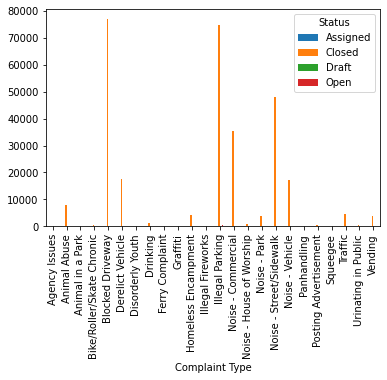

In [117]:
data.groupby(['Complaint Type','Status']).size().unstack().plot.bar(legend=True)

In [128]:
datat2 = data[data['Complaint Type'].str.contains('Blocked Driveway')==True]


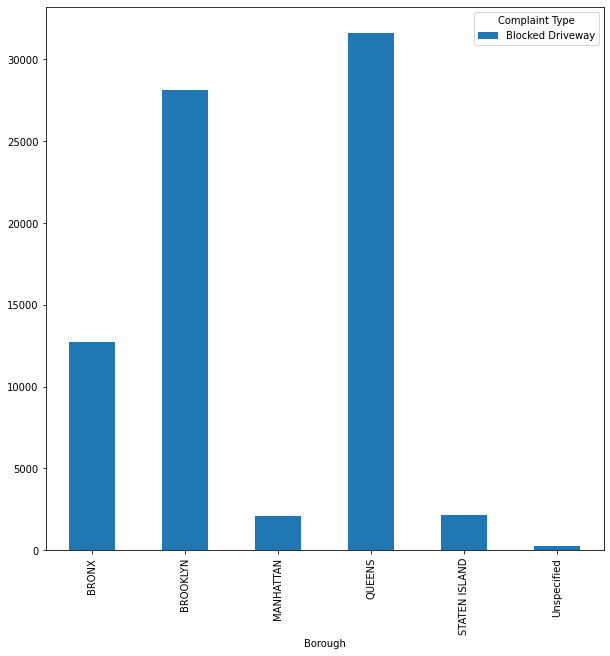

In [129]:
datat2.groupby(['Borough','Complaint Type']).size().unstack().plot.bar(figsize=(10,10),legend=True)